<a href="https://colab.research.google.com/github/DataScienceUB/DeepLearningMaster2019/blob/master/2.%20Automatic%20Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Differentiation

> The **backpropagation** algorithm was originally introduced in the 1970s, but its importance wasn't fully appreciated until a famous 1986 paper by David Rumelhart, Geoffrey Hinton, and Ronald Williams. (Michael Nielsen in "Neural Networks and Deep Learning", http://neuralnetworksanddeeplearning.com/chap2.html).

> **Backpropagation** is the key algorithm that makes training deep models computationally tractable. For modern neural networks, it can make training with gradient descent as much as ten million times faster, relative to a naive implementation. That’s the difference between a model taking a week to train and taking 200,000 years. (Christopher Olah, 2016)

We have seen that in order to optimize our models we need to compute the derivative of the loss function with respect to all model paramaters. 

The computation of derivatives in computer models is addressed by four main methods: 

+ manually working out derivatives and coding the result (as in the original paper describing backpropagation); 

![alt text](https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/back.png?raw=1)


+ numerical differentiation (using finite difference approximations); 
+ symbolic differentiation (using expression manipulation in software, such as Sympy); 
+ and automatic differentiation (AD).

**Automatic differentiation** (AD) works by systematically applying the **chain rule** of differential calculus at the elementary operator level.

Let $ y = f(g(x)) $ our target function. In its basic form, the chain rule states:

$$ \frac{\partial y}{\partial x} = \frac{\partial y}{\partial g} \frac{\partial g}{\partial x} $$

or, if there are more than one variable $g_i$ in-between $y$ and $x$ (f.e. if $f$ is a two dimensional function such as $f(g_1(x), g_2(x))$), then:

$$ \frac{\partial y}{\partial x} = \sum_i \frac{\partial y}{\partial g_i} \frac{\partial g_i}{\partial x} $$

> See https://www.math.hmc.edu/calculus/tutorials/multichainrule/

Now, let's see how AD allows the accurate evaluation of derivatives at machine precision, with only a small constant factor of overhead.

In its most basic description, AD relies on the fact that all numerical computations
are ultimately compositions of a finite set of elementary operations for which derivatives are known.

For example, let's consider the computation of the derivative of this function, that represents a 1-layer neural network model:

$$
    f(x) = \frac{1}{1 + e^{- ({w}^T \cdot  x + b)}} 
$$


First, let's write how to evaluate $f(x)$ via a sequence of primitive operations:


```python
x = ?
f1 = w * x
f2 = f1 + b
f3 = -f2
f4 = 2.718281828459 ** f3
f5 = 1.0 + f4
f = 1.0/f5
```

The question mark indicates that $x$ is a value that must be provided. 

This *program* can compute the value of $x$ and also **populate program variables**. 

We can evaluate $\frac{\partial f}{\partial x}$ at some $x$ by using the chain rule. This is called *forward-mode differentiation*. 

In our case:

In [1]:
def f(x,w,b):
    f1 = w * x
    f2 = f1 + b
    f3 = -f2
    f4 = 2.718281828459 ** f3
    f5 = 1.0 + f4
    return 1.0/f5

def dfdx_forward(x, w, b):
    f1 = w * x
    p1 = w                            # p1 = df1/dx
    f2 = f1 + b
    p2 = p1 * 1.0                     # p2 = p1 * df2/df1 
    f3 = -f2
    p3 = p2 * -1.0                    # p3 = p2 * df3/df2
    f4 = 2.718281828459 ** f3
    p4 = p3 * 2.718281828459 ** f3    # p4 = p3 * df4/df3
    f5 = 1.0 + f4
    p5 = p4 * 1.0                     # p5 = p4 * df5/df4
    f = 1.0/f5
    df = p5 * -1.0 / f5 ** 2.0        # df/dx = p5 * df6/df5
    return f, df

der = (f(3+0.00001, 2, 1) - f(3, 2, 1))/0.00001

print("Value of the function at (3, 2, 1): ",f(3, 2, 1))
print("df/dx Derivative (fin diff) at (3, 2, 1): ",der)
print("df/dx Derivative (aut diff) at (3, 2, 1): ",dfdx_forward(3, 2, 1)[1])

Value of the function at (3, 2, 1):  0.9990889488055992
df/dx Derivative (fin diff) at (3, 2, 1):  0.0018204242002717306
df/dx Derivative (aut diff) at (3, 2, 1):  0.0018204423602438651


It is interesting to note that this *program* can be automatically derived  if we have access to **subroutines implementing the derivatives of primitive functions** (such as $\exp{(x)}$ or $1/x$) and all intermediate variables are computed in the right order. 

It is also interesting to note that AD allows the accurate evaluation of derivatives at **machine precision**, with only a small constant factor of overhead.



> ** Exercise: ** Write an automatic differentiation program to compute $\partial f/ \partial w$ and $\partial f/\partial b$.

In [2]:
def f(x,w,b):
    f1 = w * x
    f2 = f1 + b
    f3 = -f2
    f4 = 2.718281828459 ** f3
    f5 = 1.0 + f4
    return 1.0/f5

# solution code

def dfdx_forward_w(x, w, b):
    pass

def dfdx_forward_b(x, w, b):
    pass

print("df/dw Derivative (aut diff) at (3, 2, 1): ",
      dfdx_forward_w(3, 2, 1))
print("df/db Derivative (aut diff) at (3, 2, 1): ",
      dfdx_forward_b(3, 2, 1))

# approximate results (just for checking)

derw = (f(3, 2+0.00001, 1) - f(3, 2, 1))/0.00001
derb = (f(3, 2, 1+0.00001) - f(3, 2, 1))/0.00001

print("df/dw Derivative (fin diff) at (3, 2, 1): ",derw)
print("df/db Derivative (fin diff) at (3, 2, 1): ",derb)


df/dw Derivative (aut diff) at (3, 2, 1):  None
df/db Derivative (aut diff) at (3, 2, 1):  None
df/dw Derivative (fin diff) at (3, 2, 1):  0.0027306226724199685
df/db Derivative (fin diff) at (3, 2, 1):  0.0009102166464991511


Forward differentiation is efficient for functions $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$ with $n << m$ (only $O(n)$ sweeps are necessary). 

For cases $n >> m$ a different technique is needed. To this end, we will rewrite the chain rule as:

$$
\frac{\partial f}{\partial x} = \frac{\partial g}{\partial x} \frac{\partial f}{\partial g}
$$

to propagate derivatives backward from a given output. This is called *reverse-mode differentiation*. Reverse pass starts at the end (i.e. $\frac{\partial f}{\partial f} = 1$) and propagates backward to all dependencies.

In [3]:
def dfdx_backward(x, w, b):
    import numpy as np
    f1 = w * x
    f2 = f1 + b
    f3 = -f2
    f4 = 2.718281828459 ** f3
    f5 = 1.0 + f4
    f = 1.0/f5
    
    pf = 1.0                           # pf = df/df
    p5 = 1.0 * -1.0 / (f5 * f5) * pf   # p5 = pf * df/df5 
    p4 = p5 * 1.0                      # p4 = p5 * df5/df4
    p3 = p4 * np.log(2.718281828459) \
          * 2.718281828459 ** f3       # p3 = p4 * df4/df3
    p2 = p3 * -1.0                     # p2 = p3 * df3/df2
    p1 = p2 * 1.0                      # p1 = p2 * df2/df1
    dfx = p1 * w                       # dfx = p1 * df1/dx 
    return f, dfx

print("df/dx Derivative (aut diff) at (3, 2, 1): ",
      dfdx_backward(3, 2, 1)[1])

df/dx Derivative (aut diff) at (3, 2, 1):  0.0018204423602438348


> ** Exercise: ** Write an automatic differentiation program to compute $\partial f/ \partial w$ and $\partial f/\partial b$.

In [0]:
# solution code

def dfdx_backward(x, w, b):
    pass

In practice, reverse-mode differentiation is a two-stage process. In the first stage the original function code is run forward, populating $f_i$ variables. In the second stage, derivatives are calculated by propagating in reverse, from the outputs to the inputs.

The most important property of reverse-mode differentiation is that it is **cheaper than forward-mode differentiation for functions with a high number of input variables**. In our case, $f : \mathbb{R}^n \rightarrow \mathbb{R}$, only one application of the reverse mode is sufficient to compute the full gradient of the function $\nabla f = \big( \frac{\partial y}{\partial x_1}, \dots ,\frac{\partial y}{\partial x_n} \big)$. This is the case of deep learning, where the number of input variables is very high. 

> As we have seen, AD relies on the fact that all numerical computations
are ultimately compositions of a finite set of elementary operations for which derivatives are known. For this reason, given a library of derivatives of all elementary functions in a deep neural network, we are able of computing the derivatives of the network with respect to all parameters at machine precision and applying stochastic gradient methods to its training. Without this automation process the design and debugging of optimization processes for complex neural networks with millions of parameters would be impossible. 

## Autograd

Autograd is a Python module (with only one function) that implements automatic differentiation.

Autograd can automatically differentiate Python and Numpy code:

+ It can handle most of Python’s features, including loops, if statements, recursion and closures.
+ Autograd allows you to compute gradients of many types of data structures (Any nested combination of lists, tuples, arrays, or dicts).
+ It can also compute higher-order derivatives.
+ Uses reverse-mode differentiation (backpropagation) so it can efficiently take gradients of scalar-valued functions with respect to array-valued or vector-valued arguments.
+ You can easily implement your custim gradients (good for speed, numerical stability, non-compliant code, etc).

In [5]:
import autograd.numpy as np
from autograd import grad

x = np.array([2, 5], dtype=float)

def test(x):
    return np.log(x[0]) + x[0]*x[1] - np.sin(x[1])

grad_test = grad(test)
print("({:.2f},{:.2f})".format(grad_test(x)[0],grad_test(x)[1]))

(5.50,1.72)


The ``grad`` function:

````
grad(fun, argnum=0, *nary_op_args, **nary_op_kwargs)

Returns a function which computes the gradient of `fun` with respect to positional argument number `argnum`. The returned function takes the same arguments as `fun`, but returns the gradient instead. The function `fun` should be scalar-valued. The gradient has the same type as the argument.
```

Then, a simple (there is no bias term) logistic regression model for $n$-dimensional data like this

$$  f(x) = \frac{1}{1 + \exp^{-(\mathbf{w}^T \mathbf{x})}} $$

can be implemented in this way:

In [6]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_predictions(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights, inputs, targets):
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

def optimize(inputs, targets, training_loss):
    # Optimize weights using gradient descent.
    gradient_loss = grad(training_loss)
    weights = np.zeros(inputs.shape[1])
    print("Initial loss:", training_loss(weights, inputs, targets))
    for i in range(100):
        weights -= gradient_loss(weights, inputs, targets) * 0.01
    print("Final loss:", training_loss(weights, inputs, targets))
    return weights

# Build a toy dataset with 3d data
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

weights = optimize(inputs, targets, training_loss)
print("Weights:", weights)

Initial loss: 2.772588722239781
Final loss: 1.0672706757870165
Weights: [ 0.48307366 -0.37057217  1.06937395]


Any complex function that can be decomposed in a set of elementary functions can be derived in an automatic way, at machine precision, by this algorithm!

**We no longer need to code complex derivatives to apply SGD! **

> ** Exercise: ** Make the necessary changes to the code below in order to compute a max-margin solution for a linear separation problem by using SGD. 

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


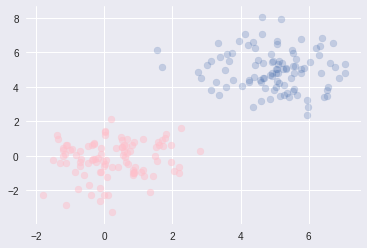

In [8]:
import numpy as np

#Example dataset
N_samples_per_class = 100
d_dimensions = 2
x = np.vstack((np.random.randn(N_samples_per_class, d_dimensions),
               np.random.randn(N_samples_per_class, d_dimensions)
               +np.array([5,5])))
y = np.concatenate([-1.0*np.ones(N_samples_per_class),
              1.*np.ones(N_samples_per_class)])

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.25)
idx = y==-1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

In [9]:
import autograd.numpy as np
from autograd import grad

def SVM_predictions(w, inputs):
    return np.dot(w[0,:-1],inputs.T)+w[0,-1]

def SVM_training_loss(weights, inputs, targets):
    pred = SVM_predictions(weights, inputs)
    return np.sum((targets-pred)**2)/inputs.shape[0]

def optimize(inputs, targets, training_loss):
    gradient_loss = grad(training_loss)
    weights = np.zeros((1,inputs.shape[1]+1))
    print("Initial loss:", training_loss(weights, inputs, targets))
    for i in range(100000):
        weights -= gradient_loss(weights, inputs, targets) * 0.001
        if i%10000 == 0:
            print(" Loss:", training_loss(weights, inputs, targets))
    print("Final loss:", training_loss(weights, inputs, targets))
    return weights

weights = optimize(x, y, SVM_training_loss)
print("Weights", weights)

Initial loss: 1.0
 Loss: 0.9524140689814686
 Loss: 0.08706236829021527
 Loss: 0.08706236575690411
 Loss: 0.0870623657569041
 Loss: 0.0870623657569041
 Loss: 0.0870623657569041
 Loss: 0.0870623657569041
 Loss: 0.0870623657569041
 Loss: 0.0870623657569041
 Loss: 0.0870623657569041
Final loss: 0.0870623657569041
Weights [[ 0.18082104  0.18867935 -0.92233123]]


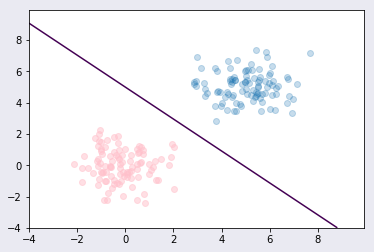

In [0]:
delta = 0.1
xx = np.arange(-4.0, 10.0, delta)
yy = np.arange(-4.0, 10.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
test_data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1)
Z = SVM_predictions(weights,test_data)

fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
Z = np.reshape(Z,(xx.shape[0],xx.shape[0]))
plt.contour(XX,YY,Z,[0])
idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.25)
idx = y==-1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

>  ** Exercise: ** Make the necessary changes to the code below in order to compute a **new sample** that is optimal for the classifier you have learned in the previous exercise. 

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


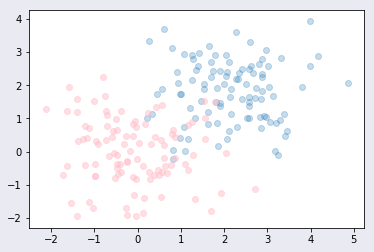

In [0]:
import numpy as np

#Example dataset
N_samples_per_class = 100
d_dimensions = 2
x = np.vstack((np.random.randn(N_samples_per_class, d_dimensions),
               np.random.randn(N_samples_per_class, d_dimensions)
               +np.array([2,2])))
y = np.concatenate([-1.0*np.ones(N_samples_per_class),
              1.*np.ones(N_samples_per_class)])

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.25)
idx = y==-1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

In [0]:
# solution code


import autograd.numpy as np
from autograd import grad

def SVM_predictions(w, inputs):
    return np.dot(w[0,:-1],inputs.T)+w[0,-1]

def SVM_training_loss(weights, inputs, targets):
    pred = SVM_predictions(weights, inputs)
    return np.sum(np.maximum(0,1-targets*pred))/inputs.shape[0]

def optimize(inputs, targets, training_loss):
    gradient_loss = grad(training_loss)
    weights = np.zeros((1,inputs.shape[1]+1))
    print("Initial loss:", training_loss(weights, inputs, targets))
    for i in range(10000):
        weights -= gradient_loss(weights, inputs, targets) * 0.01
        if i%1000 == 0:
            print(" Loss:", training_loss(weights, inputs, targets))
    print("Final loss:", training_loss(weights, inputs, targets))
    return weights

weights = optimize(x, y, SVM_training_loss)
print("Weights", weights)

Initial loss: 1.0
 Loss: 0.9794992315642236
 Loss: 0.1905663200593071
 Loss: 0.17501838574750286
 Loss: 0.17011559828158584
 Loss: 0.1687872359658234
 Loss: 0.16845216798180046
 Loss: 0.168327257660513
 Loss: 0.16820225492527846
 Loss: 0.16807712679492823
 Loss: 0.16801172040651494
Final loss: 0.16800864536955962
Weights [[ 1.15196035  1.06797815 -2.01315   ]]


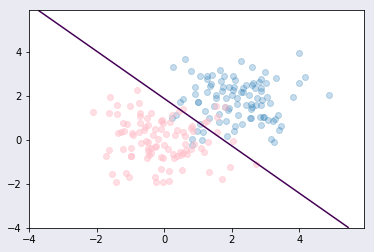

In [0]:
delta = 0.1
xx = np.arange(-4.0, 6.0, delta)
yy = np.arange(-4.0, 6.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
test_data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1)
Z = SVM_predictions(weights,test_data)

fig, ax = plt.subplots(1, 1)
fig.set_facecolor('#EAEAF2')
Z = np.reshape(Z,(xx.shape[0],xx.shape[0]))
plt.contour(XX,YY,Z,[0])
idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.25)
idx = y==-1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

## Neural Network

In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


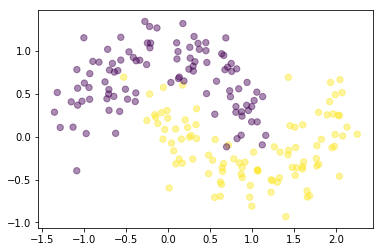

In [0]:
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import autograd.numpy as np
from autograd import grad
from autograd.misc.flatten import flatten

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, alpha=0.45)

Let's now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 2. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. 

Our network makes predictions using forward propagation, which is just a bunch of matrix multiplications and the application of the activation function(s). If $x$ is the 2-dimensional input to our network then we calculate our prediction $\hat{y}$ (also two-dimensional) as follows:

$$ z_1 = x W_1 + b_1 $$
$$ a_1 = \mbox{tanh}(z_1) $$
$$ z_2 = a_1 W_2 + b_2$$
$$ a_2 = \mbox{softmax}({z_2})$$

$W_1, b_1, W_2, b_2$ are parameters of our network, which we need to learn from our training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 500 nodes for our hidden layer then $W_1 \in \mathbb{R}^{2\times500}$, $b_1 \in \mathbb{R}^{500}$, $W_2 \in \mathbb{R}^{500\times2}$, $b_2 \in \mathbb{R}^{2}$. 

A common choice with the softmax output is the cross-entropy loss. If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$

In [0]:
num_examples = len(X)     # training set size
nn_input_dim = 2          # input layer dimensionality
nn_output_dim = 2         # output layer dimensionality

# Gradient descent parameters 

epsilon = 0.01            # learning rate for gradient descent
reg_lambda = 0.01         # regularization strength

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation to calculate our predictions
    
    z1 = np.dot(X,W1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Calculating the loss
    
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    # Add regulatization term to loss (optional)
    
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation
    
    z1 = np.dot(x,W1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

This is a version that solves the optimization problem by using the backpropagation algorithm (hand-coded derivatives):

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068888
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Text(0.5,1,'Decision Boundary for hidden layer size 3')

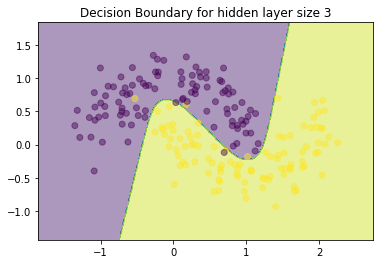

In [0]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = np.dot(X,W1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.45)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.45)

# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

The next version solves the optimization problem by using AD:

Loss after iteration 0: 0.578766
Loss after iteration 1000: 0.289271
Loss after iteration 2000: 0.233985
Loss after iteration 3000: 0.183354
Loss after iteration 4000: 0.148689
Loss after iteration 5000: 0.120565
Loss after iteration 6000: 0.102844
Loss after iteration 7000: 0.091903
Loss after iteration 8000: 0.085048
Loss after iteration 9000: 0.080741
Loss after iteration 10000: 0.077962
Loss after iteration 11000: 0.076086
Loss after iteration 12000: 0.074758
Loss after iteration 13000: 0.073776
Loss after iteration 14000: 0.073021
Loss after iteration 15000: 0.072423
Loss after iteration 16000: 0.071936
Loss after iteration 17000: 0.071532
Loss after iteration 18000: 0.071192
Loss after iteration 19000: 0.070900


Text(0.5,1,'Decision Boundary for hidden layer size 3')

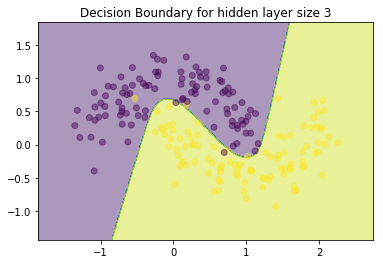

In [0]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = np.dot(X,model['W1']) + model['b1']
        a1 = np.tanh(z1)
        z2 = np.dot(a1,model['W2']) + model['b2']
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
                
        gradient_loss = grad(calculate_loss)
        
        model_flat, unflatten_m = flatten(model)
        grad_flat, unflatten_g = flatten(gradient_loss(model))
        model_flat -= grad_flat * 0.05
        model = unflatten_m(model_flat)

        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.45)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.45)

# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Let's now get a sense of how varying the hidden layer size affects the result.

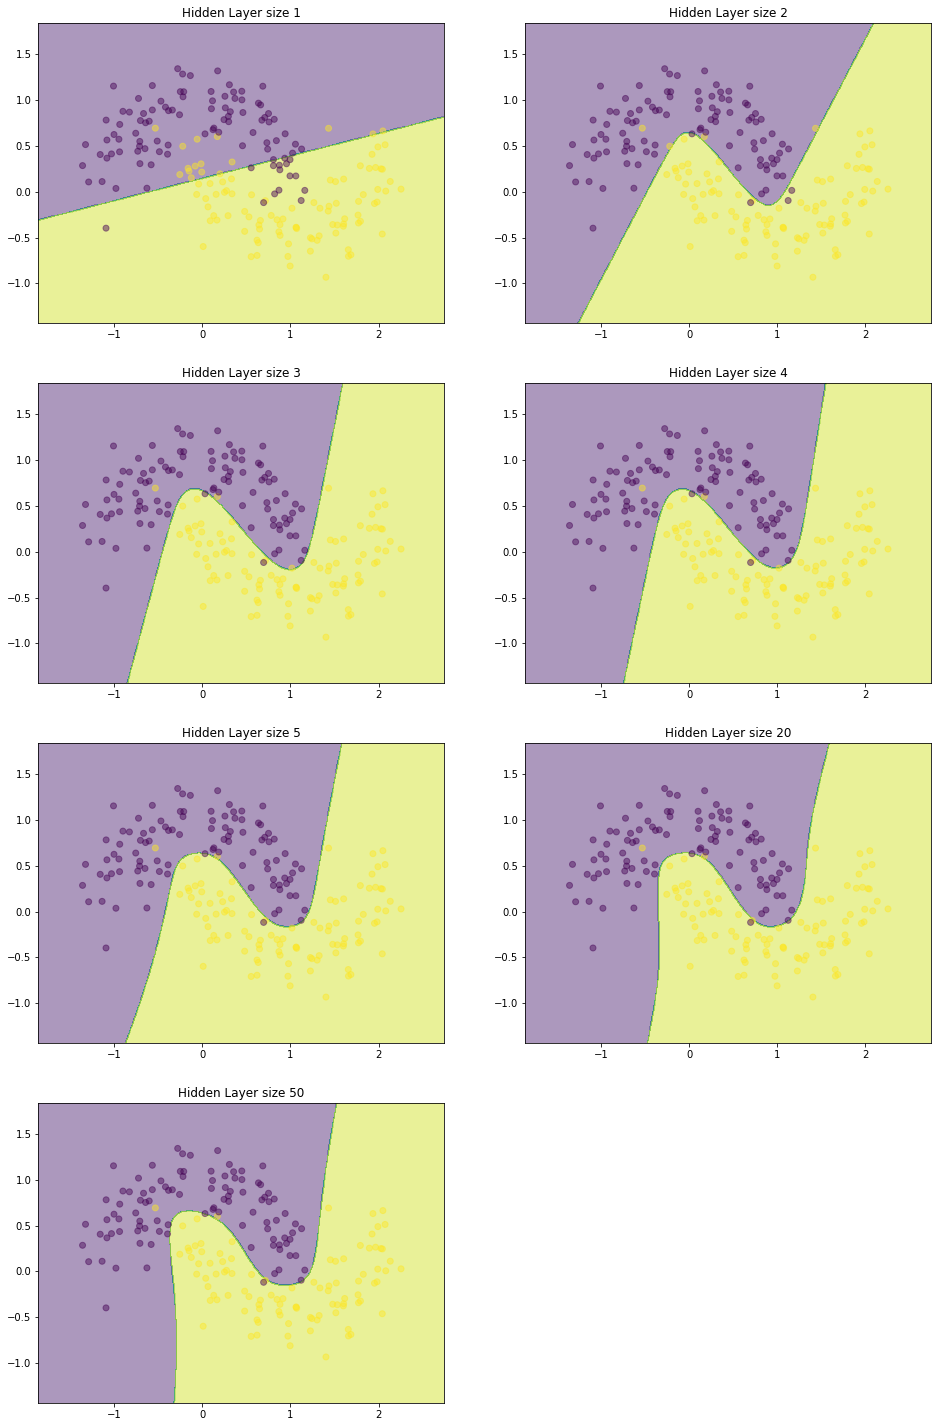

In [0]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

## Deep Learning tricks


> A naïve description of the basic setup in deep learning would be: *a many-layers-deep network of linear layers, linear convolutions and occasionally recurrent structures with nonlinear activation functions that is trained by computing the gradient of the training error through reverse mode AD.*.

AD is a critical component when developing deep models because the use of SGD is much more easy and robust (f.e. derivative computation is free of bugs!), but in spite of this fact optimization of deep models is not yet an easy task. Gradient-based optimization still suffers from some problems:
+ The system can be **poorly conditioned** (changing one parameter requires precise compensatory changes to other parameters to avoid large increases in the optimization criterion). 
+ Simply calculating the actual gradient is so **slow** in deep learning systems that it is impractical to use the true gradient for purposes of optimization.

In order to address each issues, deep learning community has developed some **tricks**. First, **gradient tricks**, namely methods to make the gradient either easier to calculate or to give it more desirable properties. And second, **optimization tricks**, namely new methods related to stochastic optimization.

The deep learning community has been developing many methods to make gradient descent work with deep architectures. These methods (related to model architectures and gradient calculation) are  numerous. Here we discuss only a small sample of methods.

+ It is not really feasible to calculate the true gradient when there is a large dataset.  Instead a sample is used. Calculating the gradient of the error of just a random sample from the dataset (or sequential windows, assuming the dataset has been randomly shuffled) is much faster.
+ In calculating the stochastic gradient, it is tempting to do the minimal amount of computation necessary to obtain an unbiased estimate, which would involve a single sample from the training set. In practice it has proven much better to use a block of contiguous samples, on the order of dozens.  This has two advantages: the first is less noise, and the second is that data-parallelism can be used.
+ In a multi-layered structure, one would expect the gradients of quantities at early layers to be nearly zero (assuming the gains at intermediate levels are below unity) or to be enormous (assuming the gains are above unity). The tricks are:
    + Rectified linear units instead of sigmoids. Classic multi-layer perceptrons use the sigmoid activation function, but this has a derivative which goes to zero when its input is too strong.  That means that when a unit in the network receives a very strong signal, it becomes difficult to change. Using a rectified linear unit (ReLU) function, overcomes this problem, making the system more plastic even when strong signals are present.
    + Gradient clipping. In the domain of deep learning, there are often outliers in the training set: exemplars that are being classified incorrectly, for example, or improper images in a visual classification task, or mislabeled examples, and the like. These can cause a large gradient inside a single mini-batch, which washes out the more appropriate signals. For this reason a technique called gradient clipping is often used, in which components of the gradient exceeding a threshold (in absolute value) are pushed down to that threshold.
+ Keeping the error surface well conditioned for gradient optimization has been one of the keys to the current widespread deployment of deep learning.
    + Dropout. Imagine a network in which multiple units together represent some important feature, requiring a precise weighting of their values in downstream processing. This would make optimization quite difficult, as it sets up couplings between parameters which must be maintained. A technique to avoid such “unfortunate collusions” is dropout, in which each unit in the network is, on each training pattern pass, randomly “dropped out” with some probability (typically 50%) by holding its value at zero. This encourages detected features to be independently meaningful. (In “production mode” dropout is turned off, and the weights scaled to compensate, to minimize the noise when performance matters.)
    + Batch normalization. Batch Normalization is a technique to provide any layer in a neural network with inputs that are zero mean/unit variance. 
    + Careful initialization. Considering how the variances of activation values and gradients can be maintained between the layers in a network leads to intelligent normalized initialization schemes, which enable substantially faster optimization convergence. 
+ Early stopping. When fitting a dynamic system to data, as exact a match as possible is desired, so the true optimum is sought. This is not the case in machine learning, where the optimization is of error on a training set, while the primary concern is generally not performance on the training set, but on as-yet-unseen new data. There is often a tradeoff between the two, encountered after optimization has proceeded for a significant amount of time. This is addressed by early stopping, in which an estimate of performance on unseen data is maintained, and optimization is halted early when this estimated generalization performance stops improving, even if performance on the training set is continuing to improve. 




## Playing with neural nets.

http://playground.tensorflow.org